In [53]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd())) 
from src.load_dataset import load_dataset
from src.train_cnn import build_model
from src.predict_emotion import predict_emotion
import matplotlib.pyplot as plt

In [54]:
train_data, val_data = load_dataset()
print("Dataset classes:", train_data.dataset.classes)

Path to dataset files: /Users/myeoh/.cache/kagglehub/datasets/jonathanoheix/face-expression-recognition-dataset/versions/1
Train batches: 28821
Validation batches: 7066
Dataset classes: ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [55]:
import torch
import torch.nn as nn
import torch.optim as optim

# ----------------------------------------------------------------------
# Code adapted from PyTorch CIFAR-10 tutorial: 
# https://pytorch.org/tutorials/downloads/cifar10_tutorial.py
# ----------------------------------------------------------------------
net = build_model()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# helper function
def calculate_accuracy(data_loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in data_loader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

train_loss = []
train_accuracy = []
test_accuracy = []

for epoch in range(20):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_data, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

    epoch_loss = running_loss / len(train_data)
    train_loss.append(epoch_loss)
    
    train_acc = calculate_accuracy(train_data, net)
    train_accuracy.append(train_acc)
    print(f'Accuracy on training set: {train_acc:.2f} %')

    test_acc = calculate_accuracy(val_data, net)
    test_accuracy.append(test_acc)
    print(f'Accuracy on test set: {test_acc:.2f} %')

print('Finished Training')

# Save model
project_root = os.path.dirname(os.getcwd())
os.makedirs(os.path.join(project_root, "models"), exist_ok=True)
save_path = os.path.join(project_root, "models", "emotion_net.pth")
torch.save(net.state_dict(), save_path)
print(f"Saved model to {save_path}")

Accuracy on training set: 42.05 %
Accuracy on test set: 41.86 %
Accuracy on training set: 48.44 %
Accuracy on test set: 46.73 %
Accuracy on training set: 50.42 %
Accuracy on test set: 47.64 %
Accuracy on training set: 54.51 %
Accuracy on test set: 50.23 %
Accuracy on training set: 57.53 %
Accuracy on test set: 51.10 %
Accuracy on training set: 59.25 %
Accuracy on test set: 51.03 %
Accuracy on training set: 61.30 %
Accuracy on test set: 51.40 %
Accuracy on training set: 63.72 %
Accuracy on test set: 53.13 %
Accuracy on training set: 66.82 %
Accuracy on test set: 52.25 %
Accuracy on training set: 70.52 %
Accuracy on test set: 53.78 %
Accuracy on training set: 71.83 %
Accuracy on test set: 53.16 %
Accuracy on training set: 72.36 %
Accuracy on test set: 52.21 %
Accuracy on training set: 76.79 %
Accuracy on test set: 53.06 %
Accuracy on training set: 77.67 %
Accuracy on test set: 52.17 %
Accuracy on training set: 78.56 %
Accuracy on test set: 51.91 %
Accuracy on training set: 81.58 %
Accura

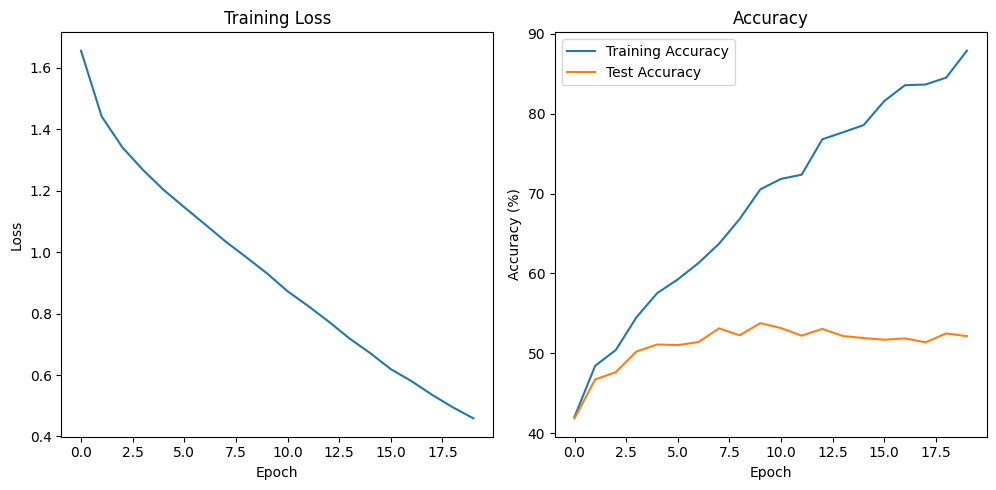

In [56]:
# Plot training curves
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 3, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(test_accuracy, label='Test Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()

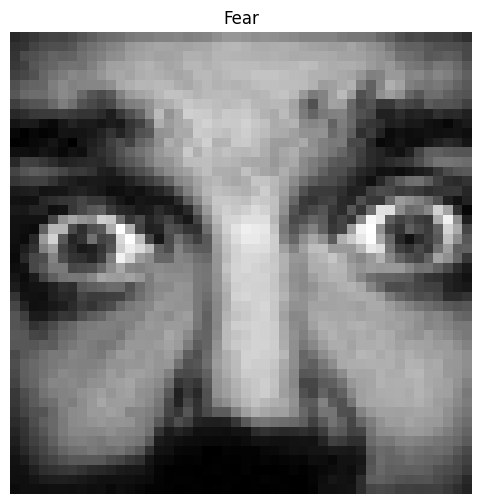

Emotion: fear, Confidence: 0.662


In [57]:
from PIL import Image
import torchvision.transforms as transforms

# Load and preprocess the image
image = Image.open('fear.jpg').convert('L')
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor()
])
image_tensor = transform(image).squeeze(0)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image_tensor, cmap='gray')
plt.title('Fear')
plt.axis('off')
plt.show()

result = predict_emotion(image_tensor, model_path='../models/emotion_net.pth')
print(f"Emotion: {result['emotion']}, Confidence: {result['confidence']:.3f}")
